In [37]:
import pickle
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('troop_movements.csv')

In [3]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-02-06 16:54:41,1,x-wing,resistance,1,9,3,5,Dagobah
1,2024-02-06 16:54:40,2,stormtrooper,resistance,7,6,4,7,Haruun Kal
2,2024-02-06 16:54:39,3,tie_fighter,resistance,7,8,8,7,Mon Cala
3,2024-02-06 16:54:38,4,tie_silencer,resistance,7,8,10,9,Cerea
4,2024-02-06 16:54:37,5,at-st,resistance,1,3,2,7,Bestine IV


In [4]:
count1 = df.groupby(['empire_or_resistance'])['empire_or_resistance'].count()
count1_df = count1.to_frame()
count1_df.columns = ['count']
count1_df['empire_or_resistance'] = ['empire', 'resistance']
count1_df

,count,empire_or_resistance
empire_or_resistance,,
empire,476,empire
resistance,524,resistance


In [5]:
df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-02-06 16:54:41,1,x-wing,resistance,1,9,3,5,Dagobah
1,2024-02-06 16:54:40,2,stormtrooper,resistance,7,6,4,7,Haruun Kal
2,2024-02-06 16:54:39,3,tie_fighter,resistance,7,8,8,7,Mon Cala
3,2024-02-06 16:54:38,4,tie_silencer,resistance,7,8,10,9,Cerea
4,2024-02-06 16:54:37,5,at-st,resistance,1,3,2,7,Bestine IV
...,...,...,...,...,...,...,...,...,...
995,2024-02-06 16:38:07,996,unknown,empire,5,2,10,8,Dagobah
996,2024-02-06 16:38:06,997,tie_fighter,empire,4,8,9,6,Dagobah
997,2024-02-06 16:38:05,998,resistance_soldier,resistance,5,4,4,4,Haruun Kal
998,2024-02-06 16:38:04,999,resistance_soldier,empire,10,7,5,3,Stewjon


In [6]:
count2 = df.groupby(['homeworld'])['homeworld'].count()
count2.columns = ['homeworld', 'count']
count2

homeworld
Alderaan        29
Aleen Minor     22
Bestine IV      21
Cerea           26
Champala        29
Chandrila       25
Concord Dawn    24
Corellia        23
Dagobah         23
Dathomir        25
Dorin           22
Eriadu          32
Glee Anselm     17
Haruun Kal      23
Iktotch         17
Iridonia        28
Kalee           16
Kashyyyk        26
Malastare       22
Mirial          26
Mon Cala        24
Muunilinst      27
Naboo           27
Ojom            27
Quermia         25
Rodia           26
Ryloth          22
Serenno         27
Shili           24
Skako           22
Socorro         18
Stewjon         30
Sullust         19
Tatooine        28
Tholoth         14
Toydaria        27
Trandosha       23
Troiken         30
Tund            15
Umbara          24
Vulpter         26
Zolan           19
Name: homeworld, dtype: int64

In [7]:
count3 = df.groupby(['unit_type'])['unit_type'].count()
count3.columns = ['unit_type', 'count']
count3

unit_type
at-at                 115
at-st                 145
resistance_soldier    121
stormtrooper          121
tie_fighter           137
tie_silencer          107
unknown               119
x-wing                135
Name: unit_type, dtype: int64

In [8]:
df['is_resistance'] = np.where(df['empire_or_resistance'] == 'resistance', True, False)

In [9]:
df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-02-06 16:54:41,1,x-wing,resistance,1,9,3,5,Dagobah,True
1,2024-02-06 16:54:40,2,stormtrooper,resistance,7,6,4,7,Haruun Kal,True
2,2024-02-06 16:54:39,3,tie_fighter,resistance,7,8,8,7,Mon Cala,True
3,2024-02-06 16:54:38,4,tie_silencer,resistance,7,8,10,9,Cerea,True
4,2024-02-06 16:54:37,5,at-st,resistance,1,3,2,7,Bestine IV,True
...,...,...,...,...,...,...,...,...,...,...
995,2024-02-06 16:38:07,996,unknown,empire,5,2,10,8,Dagobah,False
996,2024-02-06 16:38:06,997,tie_fighter,empire,4,8,9,6,Dagobah,False
997,2024-02-06 16:38:05,998,resistance_soldier,resistance,5,4,4,4,Haruun Kal,True
998,2024-02-06 16:38:04,999,resistance_soldier,empire,10,7,5,3,Stewjon,False


<Axes: xlabel='empire_or_resistance', ylabel='count'>

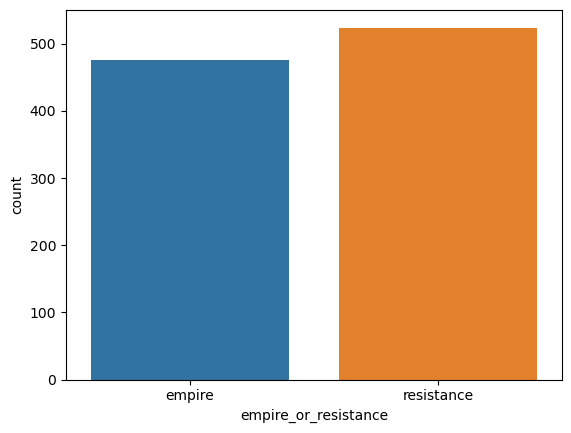

In [10]:
sns.barplot(count1_df, x='empire_or_resistance', y='count')

In [11]:
X = df[['homeworld', 'unit_type']]
y = df['is_resistance']

In [15]:
df_dummies = pd.get_dummies(df, columns=['homeworld', 'unit_type', 'is_resistance'], dtype=float)
df_dummies
df_dummies.columns

Index(['timestamp', 'unit_id', 'empire_or_resistance', 'location_x',
       'location_y', 'destination_x', 'destination_y', 'homeworld_Alderaan',
       'homeworld_Aleen Minor', 'homeworld_Bestine IV', 'homeworld_Cerea',
       'homeworld_Champala', 'homeworld_Chandrila', 'homeworld_Concord Dawn',
       'homeworld_Corellia', 'homeworld_Dagobah', 'homeworld_Dathomir',
       'homeworld_Dorin', 'homeworld_Eriadu', 'homeworld_Glee Anselm',
       'homeworld_Haruun Kal', 'homeworld_Iktotch', 'homeworld_Iridonia',
       'homeworld_Kalee', 'homeworld_Kashyyyk', 'homeworld_Malastare',
       'homeworld_Mirial', 'homeworld_Mon Cala', 'homeworld_Muunilinst',
       'homeworld_Naboo', 'homeworld_Ojom', 'homeworld_Quermia',
       'homeworld_Rodia', 'homeworld_Ryloth', 'homeworld_Serenno',
       'homeworld_Shili', 'homeworld_Skako', 'homeworld_Socorro',
       'homeworld_Stewjon', 'homeworld_Sullust', 'homeworld_Tatooine',
       'homeworld_Tholoth', 'homeworld_Toydaria', 'homeworld_Trandosha'

In [26]:
df_x = df_dummies.columns[7:-2].tolist()
df_x
type(df_x)

list

In [23]:
df_y = df_dummies.columns[-2:].tolist()

In [27]:
X = df_dummies[df_x]
y = df_dummies[df_y]

In [29]:
model = DecisionTreeClassifier()

model = clf.fit(X, y)

In [30]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': df_x, 'Importance': importances})

<Axes: xlabel='Feature', ylabel='Importance'>

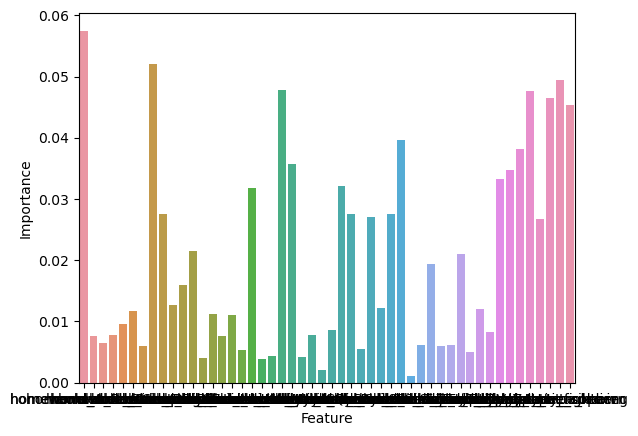

In [33]:
sns.barplot(feature_importances, x='Feature', y='Importance')

NameError: name 'pickle' is not defined

In [38]:
filename = "model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(model, file)